**Biblioteki, wczytanie danych, podział na zbiór treningowy i testowy**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

data = np.loadtxt('C:\\Users\\Dawid\\Desktop\\semestr6\\podstawy uczenia maszynowego\\Porównanie jakości klasyfikatorów\\logistyczna.csv', delimiter=',', skiprows=1)
print(data)

X = data[:,1:]
y = data[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

X_train, y_train

[[  0.   380.     3.61   3.  ]
 [  1.   660.     3.67   3.  ]
 [  1.   800.     4.     1.  ]
 ...
 [  0.   460.     2.63   2.  ]
 [  0.   700.     3.65   2.  ]
 [  0.   600.     3.89   3.  ]]


(array([[360.  ,   3.27,   3.  ],
        [500.  ,   3.08,   3.  ],
        [800.  ,   4.  ,   3.  ],
        [640.  ,   3.12,   3.  ],
        [700.  ,   3.56,   2.  ],
        [360.  ,   3.14,   1.  ],
        [600.  ,   3.28,   3.  ],
        [480.  ,   3.57,   2.  ],
        [520.  ,   2.98,   2.  ],
        [560.  ,   3.32,   4.  ],
        [720.  ,   3.77,   3.  ],
        [660.  ,   3.45,   4.  ],
        [800.  ,   3.31,   3.  ],
        [660.  ,   3.88,   2.  ],
        [580.  ,   3.29,   4.  ],
        [660.  ,   3.7 ,   4.  ],
        [400.  ,   2.93,   3.  ],
        [580.  ,   3.46,   2.  ],
        [460.  ,   3.14,   3.  ],
        [560.  ,   3.04,   3.  ],
        [800.  ,   2.9 ,   2.  ],
        [580.  ,   4.  ,   2.  ],
        [700.  ,   4.  ,   3.  ],
        [540.  ,   3.49,   2.  ],
        [540.  ,   3.28,   3.  ],
        [740.  ,   3.34,   4.  ],
        [520.  ,   3.29,   1.  ],
        [500.  ,   3.88,   4.  ],
        [520.  ,   4.  ,   1.  ],
        [540. 

**Regresja logistyczna**

In [2]:
lr = LogisticRegression(random_state=0, solver='lbfgs', max_iter=500, multi_class='multinomial').fit(X_train, y_train)
lr_train_acc = lr.score(X_train, y_train)
lr_test_acc = lr.score(X_test, y_test)
lr_train_acc, lr_test_acc
print('trening:', lr_train_acc)
print('test:', lr_test_acc)

trening: 0.7083333333333334
test: 0.70625


**Lasy losowe**

In [3]:
rfc = RandomForestClassifier(random_state=0, n_estimators=200, max_leaf_nodes=15).fit(X_train, y_train)
rfc_train_acc = rfc.score(X_train, y_train)
rfc_test_acc = rfc.score(X_test, y_test)
rfc_train_acc, rfc_test_acc
print('trening:', rfc_train_acc)
print('test:', rfc_test_acc)

trening: 0.8
test: 0.68125


**Confusion matrix**

In [4]:
lr_prediction = lr.predict(X)
rfc_prediction = rfc.predict(X)
cf_matrix_lr = confusion_matrix(y, lr_prediction, labels=[1, 0])
cf_matrix_rfc = confusion_matrix(y, rfc_prediction, labels=[1, 0])
cf_matrix_lr, cf_matrix_rfc

(array([[ 24, 103],
        [ 14, 259]], dtype=int64),
 array([[ 38,  89],
        [ 10, 263]], dtype=int64))

**Krzywa ROC**

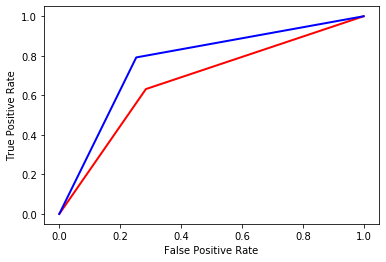

In [5]:
LRPR, LRTPR, _ = roc_curve(lr_prediction, y)
FPR, TPR, _ = roc_curve(rfc_prediction, y)
plt.plot(LRPR, LRTPR, linewidth=2, color='red') # ROC dla regresji logistycznej
plt.plot(FPR, TPR, linewidth=2, color='blue') # ROC dla lasów losowych
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

**AUC**

In [6]:
AUC_lr = roc_auc_score(lr_prediction, y)
AUC_rfc = roc_auc_score(rfc_prediction, y)

AUC_lr, AUC_rfc
print('dla regresji logistycznej: ', AUC_lr)
print('dla lasów losowych', AUC_rfc)

dla regresji logistycznej:  0.6735242803140448
dla lasów losowych 0.7694128787878787


Porównując skuteczność regresji logistycznej i lasów losowych to regresja logistyczna wypada lepiej, ponieważ posiada porównywalną skuteczność dla zbioru testowego i treningowego. Z confusion matrix zaś wynika, że model lasów losowych poradził sobie lepiej z klasyfikacją całego zbioru. Krzywa ROC lasów losowych ma większe wartości na osi y od krzywej regresji logistycznej. AUC dla lasów losowych jest większy, co oznacza podobnie jak w przypadku confusion matrix że to klasyfikator lasów losoych lepiej radzi sobie z klasyfikacją całego zbioru.